Se tiene el siguiente hamiltoniano:

$$ H = \frac{1}{2m}p_1^{2}+\frac{1}{2m}p_2^{2}+\frac{1}{2}k_1 x_1^{2} + \frac{1}{2}k_3 x_2^{2} + \frac{1}{2}k_2(x_2 - x_1)^2 $$
$$\dot{x} = \frac{1}{m} p_x$$
$$\dot{p_x} = (k_1 - k_2)L - (k_1 + k_2) x $$

In [0]:
import numpy as np 
import matplotlib.pyplot as plt
import time

In [0]:
k1 = 1.0
k2 = 1.0
k3 = 1.0
m1 = 1.0
m2 = 1.0

In [0]:
def Q_Dot(Q):
  #regresa la derivada del vector Q
    x1, x2, p1, p2 = Q[0], Q[1], Q[2], Q[3]
    x1_dot = p1/m1
    x2_dot = p2/m2
    p1_dot = -k1*x1 + k2*(x2-x1)
    p2_dot = -k3*x2 - k2*(x2-x1)

    return np.array([x1_dot, x2_dot,  p1_dot, p2_dot])

In [0]:
def paso_euler(f,t_n,y_n,dt):
    y_dot = f(t_n, y_n)
    y_n_mas_1 = y_n + dt*y_dot
    
    return y_n_mas_1

In [0]:
def integrador_simple(f, t, y_0, dt):
    
    tiempo = time.time()
    
  #Calcula la trayectoria de valores de y usando el metodo de Euler con pasos constantes
  # f - función que calcula la derivada y(t), f(t,y)
  # y_0 - valor inicial de y y_0 = [y0_0, y1_0,...]
  #t - lista con el intervalo [t_0, t_f]
  #dt - distancia entre pasos de tiempo
  
    t_0, t_f = t
    n = int((t_f - t_0)/dt)

    d = len(y_0)

    y_tray = np.zeros(((n+1), d))

    t = np.linspace(t_0, t_f, n+1)

    y_tray[0, :] = y_0

    tiempo = time.time() - tiempo

    for i in range(n):
        y_tray[i+1, :] = paso_euler(f, t[i], y_tray[i, :], dt)
    
    print('Masas: m1 = ' + str(m1) + ' m2 = ' + str(m2))
    print('constantes de resortes: k1 = ' + str(k1) + ' k2 = ' + str(k2) + ' k3 = ' + str(k3))  
    print('Tiempo de computo = ' + ('%.5f' %tiempo) + 's')  

    return t, y_tray

def Q_dot_t(t,y):
    return Q_Dot(y)

Masas: m1 = 1.0 m2 = 1.0
constantes de resortes: k1 = 1.0 k2 = 1.0 k3 = 1.0
Tiempo de computo = 0.00422s


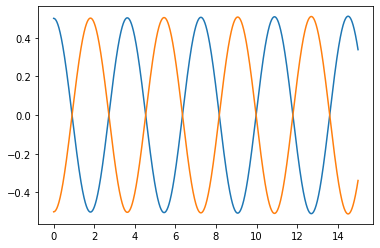

In [0]:
t, Q_Traj = integrador_simple(Q_Dot_t,[0,15],[0.5, -0.5, 0, 0],.001 )

plt.plot(t,Q_Traj[:,0])
plt.plot(t,Q_Traj[:,1])

## Para distintos parametros y mismas condiciones iniciales

In [0]:
k1 = 0.7
k2 = 1.0
k3 = 1.0
m1 = 1.0
m2 = 2.5

Masas: m1 = 1.0 m2 = 2.5
constantes de resortes: k1 = 0.7 k2 = 1.0 k3 = 1.0
Tiempo de computo = 0.00058s


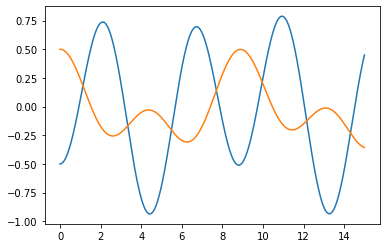

In [0]:
t, Q_Traj = integrador_simple(Q_Dot_t,[0,15],[-0.5,0.5,0.,0],0.001)

plt.plot(t,Q_Traj[:,0])
plt.plot(t,Q_Traj[:,1])

## Para distintas condiciones iniciales y mismos parametros

In [0]:
k1 = 1.0
k2 = 1.0
k3 = 1.0
m1 = 1.0
m2 = 1.0

Masas: m1 = 1.0 m2 = 1.0
constantes de resortes: k1 = 1.0 k2 = 1.0 k3 = 1.0
Tiempo de computo = 0.00035s


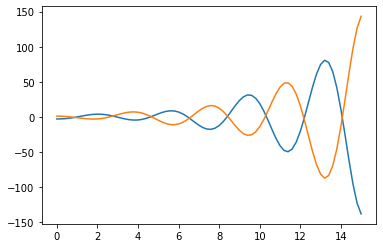

In [0]:
t, Q_Traj = integrador_simple(Q_Dot_t,[0,15],[-3,1,0.3,-0.4],0.2)

plt.plot(t,Q_Traj[:,0])
plt.plot(t,Q_Traj[:,1])

## Diferentes parametros y diferentes condiciones iniciales

In [0]:
k1 = 2.0
k2 = 0.7
k3 = 1.0
m1 = 3.0
m2 = 0.6

Masas: m1 = 3.0 m2 = 0.6
constantes de resortes: k1 = 2.0 k2 = 0.7 k3 = 1.0
Tiempo de computo = 0.00033s


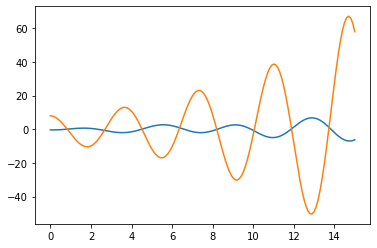

In [0]:
t, Q_Traj = integrador_simple(Q_Dot_t,[0,15],[-0.4,8,-0.6,-1.4],0.1)

plt.plot(t,Q_Traj[:,0])
plt.plot(t,Q_Traj[:,1])

## Calculo de la energía del sistema en cada paso del tiempo

In [0]:
def energy(f,t):
    x1, x2 = f[0], f[1]
    p1, p2 = f[2], f[3]
    Tiempo = []
    E = []
    T = []
    V = []
    
    for i in range (t):
        Tiempo. append(i)
        T.append(p1/m1 + p2/m2)
        V.append((1/2)*k1*x1**2 + (1/2)*(x2-x1)**2 + (1/2)*k3*x2**2)
        e = T[i]+V[i]
        
        E.append (e)
    return E

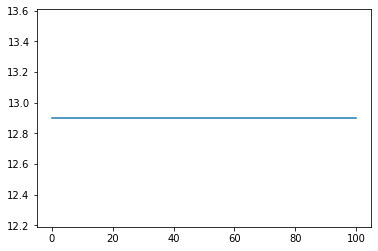

In [0]:
k1 = 1.0
k2 = 1.0
k3 = 1.0
m1 = 1.0
m2 = 1.0

plt.plot(np.linspace(0,len(energy([-3,1,0.3,-0.4],100)),100),energy([-3,1,0.3,-0.4],100))

In [0]:
m = 1.0
k = 1.0

X = []
P = []
X_DOT = []
P_DOT = []

n = int(input('Dime el número de masas acopladas en el sistema: '))

Cx = []
Cp = []
C = []

print('Condiciones iniciales para la posición')
for t in range (1, int(n)+1):
    Cx.append(float(input('Dime la posición inicial de la masa '+str(t)+' :')))
print('Dime las condiciones iniciales de los momentos ')
for T in range (1,int(n)+1):
    Cp.append(float(input('Dime el momento inicial de la masa '+str(T))+':'))
u = Cx + cp
C = np.array(u)

def Q_DOT(f):
    for i in range (int(n)):
        X.append(float(f[i]))
    for j in range (int(n),2*int(n)):
        P.append(float(f[j]))
    for l in range (int(n)):    
        X_DOT.append(float(P[L]/m))
    for q in range (int(n)):
        if q == 0:
            P_DOT.append(float(k*(X[q])))
        elif q>0 and q<int(n):
            P_DOT.append(float(k*(X[q-1]+X[q])))
        else:
            P_DOT.append(float(k*(X[q])))
    return X_DOT+P_DOT
            
    
        

Dime el número de masas acopladas en el sistema: 2
Condiciones iniciales para la posición
Dime la posición inicial de la masa 1 :-0.8
Dime la posición inicial de la masa 2 :0.8
Dime las condiciones iniciales de los momentos 
Dime el momento inicial de la masa 12


ValueError: could not convert string to float: '2:'

In [0]:
def paso_euler2(f,t_n,y_n,dt)
  y_dot = f(t_n,y_)
    print(' f(t_n,y_n) : ', f(t_n,y_n))
    print('y_dot : ', y_dot)
    print('y_n .', y_n)
    
    y_n_mas_1 =y_n + dt*y_dot
    return y_n_mas_1
def integrador_simple2(f, t, y_0, dt):
    tiempo = time.time()
    
    t_0, t_f = t
    n = int((t_f - t_0)/dt)
    d = len(y_0)
    y_tray = np.zeros(((n+1),d))
    t = np.linspace(t_0,t_f,n+1)
    y_tray[0,:] = y_0
    
    tiempo = time.time() - tiempo
    
    for i in range(n):
        y_tray[i+1,:] = paso_euler2(f,t[i],y_tray[i,:],dt)
        
        print('Constantes de resorte : k1 = ' +str(k1) + 'k2 = ' + str(k2) + ' k3 = ' + str(k3))
        print('Tiempo de computo =' + ('%.5f' %tiempo) + 's')
        
        return t, y_tray
    def Q_DOT_T (t,y):